<a href="https://colab.research.google.com/github/praveen101323/v/blob/main/ml_pca_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

In [3]:
df = pd.read_csv('/content/telecom_churn.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
label=LabelEncoder()
df['state']=label.fit_transform(df['state'])
df['international plan']=label.fit_transform(df['international plan'])
df['voice mail plan']=label.fit_transform(df['voice mail plan'])
df['phone number']=label.fit_transform(df['phone number'])
df['churn']=label.fit_transform(df['churn']) # kmeans means only we need to transform other wise dont need supervised
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int64  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   int64  
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   int64  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,3057,0,1,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,1528,0,0,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,42,0,0,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1331,1,0,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [7]:
wcss = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter=300,n_init = 10, random_state =0)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)


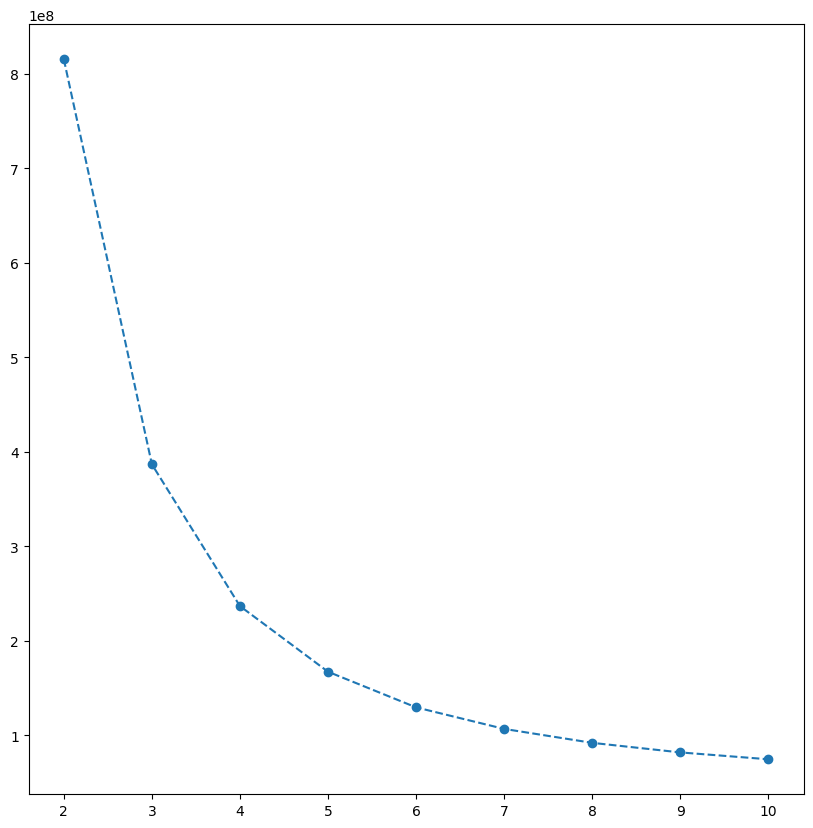

In [8]:
plt.figure(figsize=(10,10))
plt.plot(range(2,11),wcss,marker='o',linestyle = '--')

In [9]:
var=VarianceThreshold(threshold=0.25)
x=var.fit_transform(df)
print(x)

[[ 16.   128.   415.   ...   3.     2.7    1.  ]
 [ 35.   107.   415.   ...   3.     3.7    1.  ]
 [ 31.   137.   415.   ...   5.     3.29   0.  ]
 ...
 [ 39.    28.   510.   ...   6.     3.81   2.  ]
 [  6.   184.   510.   ...  10.     1.35   2.  ]
 [ 42.    74.   415.   ...   4.     3.7    0.  ]]


In [10]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter=300,n_init= 10, random_state=45)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_
kmeans

KMeans(n_clusters=3, n_init=10, random_state=45)

In [11]:
silhouette_avg=silhouette_score(df,kmeans.labels_)
silhouette_avg

0.5479528727853232

In [12]:
pca = PCA(n_components=4)
dfs = pca.fit_transform(df)
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
label = kmeans.labels_
print(silhouette_score(df,label))
print(dfs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5479502771752467
[[ 2.60063810e+02 -8.76353981e+01  2.98774251e+01  3.02572145e+01]
 [-9.10091898e+01  1.68780790e+01  3.50466591e+01  4.20780338e+01]
 [-5.48843817e+02 -6.13937637e+01  4.69395764e+01 -8.05290992e+01]
 ...
 [-1.62414236e+03 -3.49158250e+00 -7.82866990e+01  4.21206962e+01]
 [-3.34939722e+02 -3.14814772e+01 -5.79835018e-01 -7.84570531e+01]
 [ 8.92968923e+02 -5.81460686e+01 -2.98994765e+01  6.95727788e+01]]


In [13]:
x= df.drop(columns=['churn'],axis= 1)
y = df['churn']
x_train,x_test,y_train,y_test = train_test_split(x,y , train_size =.8,random_state =23)
x_train,x_test,y_train,y_test

(      state  account length  area code  phone number  international plan  \
 1365     44             162        408          2482                   0   
 2829     25             130        510          2640                   0   
 670      49              32        408          1540                   0   
 2745     38              61        408           546                   0   
 1407     25              73        415          3001                   0   
 ...     ...             ...        ...           ...                 ...   
 2998      5              71        415           190                   0   
 1993     15              86        510          1108                   0   
 1064     50             185        415          2763                   1   
 742       9             116        415          2359                   0   
 595      11              87        408          1193                   0   
 
       voice mail plan  number vmail messages  total day minutes  \
 1365 

In [22]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.9220389805097451
Confusion Matrix:
 [[547  25]
 [ 27  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       572
           1       0.73      0.72      0.72        95

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



In [38]:
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns , 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending = False)
feature_importance_df

,Feature,Importance
7,total day minutes,0.218202
19,customer service calls,0.115049
10,total eve minutes,0.096504
17,total intl calls,0.090656
4,international plan,0.072110
16,total intl minutes,0.065660
9,total day charge,0.054188
5,voice mail plan,0.054065
13,total night minutes,0.030118
15,total night charge,0.028221


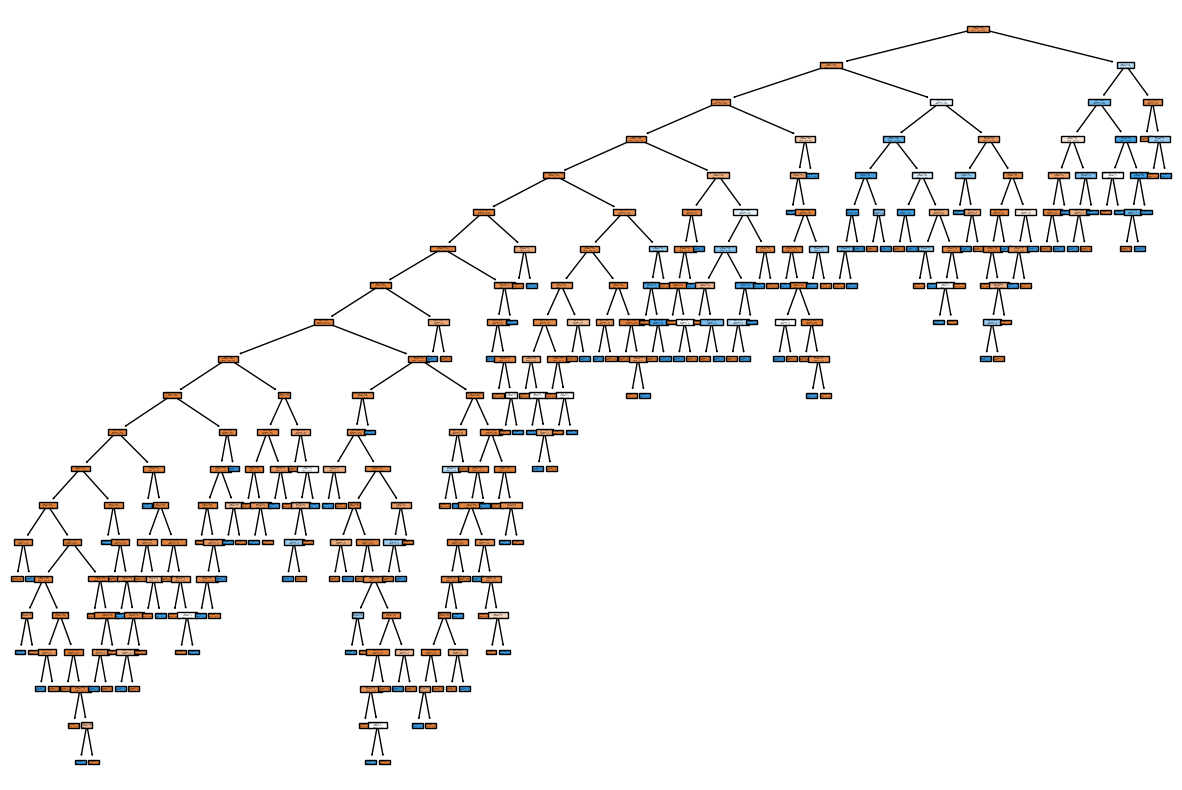

In [41]:
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=x.columns)
plt.show()


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=84), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Step 5: Making Predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

# Step 6: Evaluating the Model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.9370314842578711
Confusion Matrix:
 [[553  13]
 [ 29  72]]
